### 📝 Drone Detection using YOLOv5
Now, let's try the model, See the training notebook to know how we trained this model

Clone the Yolo v5 repo from ultralytics

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17608 (delta 7), reused 2 (delta 2), pack-reused 17593 (from 2)
Receiving objects: 100% (17608/17608), 16.87 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (11986/11986), done.


Install the required dependencies in the repo

In [ ]:
!pip install -r requirements.txt

Import the main Python libraries needed for data preparation.

In [3]:
import cv2
import torch
import numpy as np

Let's try a video containing a drone, the result will be in '/content/Inference/flying drone output.mp4'

In [ ]:
# Load the model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/model/best.pt', source='local')

# Set the video path
video_path = '/content/Inference/flying-drone.mp4'
output_path = '/content/Inference/flying drone output.mp4'

# Open the video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference
    results = model(frame)

    # Convert results to numpy array
    annotated_frame = results.render()[0]

    # Write the frame
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common

Now let's try in real-time 

In [ ]:
# Load your custom YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/model/best.pt', source='local')

# Open your video file
video_path = 'path/to/your/video.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Processing video: {video_path}")
print(f"Video resolution: {width}x{height}, FPS: {fps}")

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("End of video or failed to read frame")
        break

    # Convert BGR to RGB (YOLO expects RGB)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(rgb_frame)

    # Render detections on frame
    annotated_frame = results.render()[0]

    # Convert back to BGR for OpenCV display
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)

    # Display the frame with detections
    cv2.imshow('YOLOv5 Video Detection', annotated_frame)

    # Control playback speed (adjust delay based on your needs)
    # Press 'q' to quit, 'p' to pause
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('p'):
        cv2.waitKey(0)  # Wait until any key is pressed

# Release resources
cap.release()
cv2.destroyAllWindows()
print("Video processing completed!")

Try with an image

YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


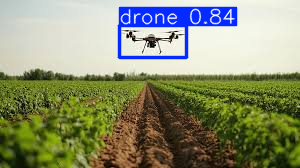

In [ ]:
# Load the model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/model/best.pt', source='local')

# Test with a single image
img = '/content/drone1.jpeg'
results = model(img)
results.show()